# Deep learning framework example: Named Entity Recognition

This notebook demonstrates how to use the deeplearning API to train and test the model on the [CoNNL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/).  The task is to identify named entities (i.e. people, organizations etc).  See the [saved version](https://htmlpreview.github.io/?https://github.com/plandes/deepnlp/blob/master/example/ner/notebook/ner.html) for output.

**Important**: Please see the Movie Review notebook example in the `zensols.movie` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
from harness import NotebookHarness
harness = NotebookHarness()
mng = harness()
#mng = harness(1, 'target2')

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [2]:
from zensols.config import Writable
# set indention level for human readable (pretty print) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = mng.create_facade('glove50')
facade.write()

executor:
  model: NER: glove_50 
  feature splits:
    split stash splits:
      test: 3453 (16.6%)
      train: 14041 (67.7%)
      dev: 3250 (15.7%)
      total: 20744
    total this instance: 20744
    keys consistent: True
    delegate:
      key splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
      total: 20744
  batch splits:
    split stash splits:
      test: 108 (16.6%)
      train: 439 (67.6%)
      dev: 102 (15.7%)
      total: 649
    total this instance: 649
    keys consistent: True
    delegate:
      name: sent_batch_stash
      chunk_size: 0
      workers: 2
      batch_size: 32
      data_point_id_sets_path: ../data/batch/b32/keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'tags', 'ents', 'glove_50_embedding', 'syns', 'mask'}
      priming: False
  network settings:
    name: net_settings
    recurrent_crf_settings:
      name: r

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

tr:3707.118|va min:5444.474|va:3050.425|lr:0.001 \/:  50%|█████     | 1/2 [00:39<00:20, 20.03s/it]/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to

Name: NER: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 11/28/2021 04:14:45:389479
    ended: 11/28/2021 04:15:22:058194
    batches: 439
    ave data points per batch/total: 32.0/14041
    min/ave/max loss: 1539.73608/3707.11770/7965.04328
  validation:
    started: 11/28/2021 04:15:02:328926
    ended: 11/28/2021 04:15:24:688819
    batches: 102
    ave data points per batch/total: 503.5/51362
    converged/epochs: 2/2
    min/ave/max loss: 1345.47699/3050.42521/9157.01098
    accuracy: 0.944 (48497/51362)
    micro: F1: 0.944, precision: 0.944, recall: 0.944
    macro: F1: 0.607, precision: 0.785, recall: 0.590
    weighted: F1: 0.936, precision: 0.940, recall: 0.944
  test:
    started: 11/28/2021 04:15:26:430323
    ended: 11/28/2021 04:15:27:810956
    batches: 108
    ave data points per batch/total: 430.0/46435
    min/ave/max loss: 0.00000/0.00000/0.00000
    accuracy: 0.940 (43654/46435)
    micro: F1: 0.940, precision: 0.940, recall: 0.940
    macro: 

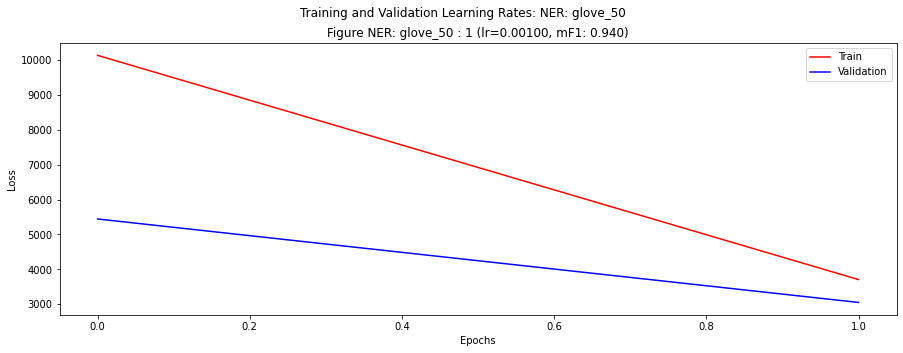

In [3]:
facade.epochs = 2
mng.run()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.  Start with Glove 50 dimensional word embeddings with a learning rate of 0.01 and 20 epochs.

In [ ]:
facade.learning_rate = 0.01
facade.epochs = 10
mng.run()

tr:1138.549|va min:1514.247|va:1241.259|lr:0.01 \/:  10%|█         | 1/10 [00:39<02:58, 19.79s/it]/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to

tr:772.971|va min:1111.123|va:1067.856|lr:0.01 \/:  30%|███       | 3/10 [01:18<02:18, 19.81s/it]/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/landes/opt/lib/python-3.9.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to 

tr:569.748|va min:1055.598|va:1096.369|lr:0.01 /\:  70%|███████   | 7/10 [02:17<00:58, 19.44s/it]

# Glove 300 embeddings

Next we use the same learning rate, but switch to the 300 dimension version of the embeddings.  The number of epochs is reduced because I have run the test before I know at what epoch the validation loss converges.  Since the model is saved only when the validation loss decreases, we early stop at 8 epochs.

In [ ]:
facade.epochs = 8
facade.embedding = 'glove_300_embedding'
mng.run()

# Word2vec Embeddings

Now we switch to the Google 300D word2vec pretrained vectors using 12 epochs, even though it has converged at 9 epochs previously.

In [ ]:
facade.epochs = 12
facade.embedding = 'word2vec_300_embedding'
mng.run()

# BERT Embeddings

Now we test with Bert context aware frozen (not trainable) embeddings using 10 epochs.  We must empty the `net_settings` attributes, which are the lingustic features, since Bert tokenizes using the word piece algorithm and the tensor shapes will not align.  We'll address this later.

In [ ]:
facade = mng.create_facade('transformer-trainable')
mng.run()
facade.persist_result()

In [ ]:
mng.clear()
facade = mng.create_facade('transformer-trainable')
facade.net_settings.add_attributes = ('syns_expander', 'tags_expander')
facade.epochs = 5
mng.run()

In [ ]:
mng.clear()
mng.config('transformer_trainable_resource', model_id='roberta-base')
facade = mng.create_facade('transformer-trainable')
facade.epochs = 8
mng.run()

In [ ]:
import logging
logging.getLogger('zensols.deepnlp.transformer.optimizer').setLevel(logging.INFO)
mng.clear()
mng.config('model_settings',
           scheduler_class_name='zensols.deepnlp.transformer.TransformerSchedulerFactory',
           scheduler_params="dict: {'name': 'linear', 'num_warmup_steps': 0.01}")
facade = mng.create_facade('transformer-trainable')
facade.epochs = 5
mng.run()

In [ ]:
mng.clear()
facade = mng.create_facade('transformer-trainable-large')
mng.run()

In [ ]:
import logging
logging.getLogger('zensols.deepnlp.transformer.optimizer').setLevel(logging.INFO)
mng.clear()
mng.config('model_settings',
           scheduler_class_name='zensols.deepnlp.transformer.TransformerSchedulerFactory',
           scheduler_params="dict: {'name': 'linear', 'num_warmup_steps': 0.01}")
facade = mng.create_facade('transformer-trainable-large')
facade.epochs = 10
mng.run()